In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import pandas as pd 

df = pd.read_csv("dataset/data.csv")
print(df.shape)
# print(df.head())
# print(df.info())
print(df.isnull().sum())

(8950, 18)
CUST_ID                                0
BALANCE                             3951
BALANCE_FREQUENCY                   3951
PURCHASES                           3951
ONEOFF_PURCHASES                    3951
INSTALLMENTS_PURCHASES              3951
CASH_ADVANCE                        3951
PURCHASES_FREQUENCY                 3951
ONEOFF_PURCHASES_FREQUENCY          3951
PURCHASES_INSTALLMENTS_FREQUENCY    3951
CASH_ADVANCE_FREQUENCY              3951
CASH_ADVANCE_TRX                    3951
PURCHASES_TRX                       3951
CREDIT_LIMIT                        3951
PAYMENTS                            3951
MINIMUM_PAYMENTS                    4111
PRC_FULL_PAYMENT                    3951
TENURE                              3951
dtype: int64


Limpeza dos Dados

In [42]:
# Remover colunas irrelevantes (se houver)
df = df.drop(columns=['CUST_ID'])  # CUST_ID é apenas identificador

# Preencher valores ausentes (exemplo: com a média)
df.fillna(df.mean(), inplace=True)

Normalização

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Redução de Dimensionalidade para Visualização (PCA)

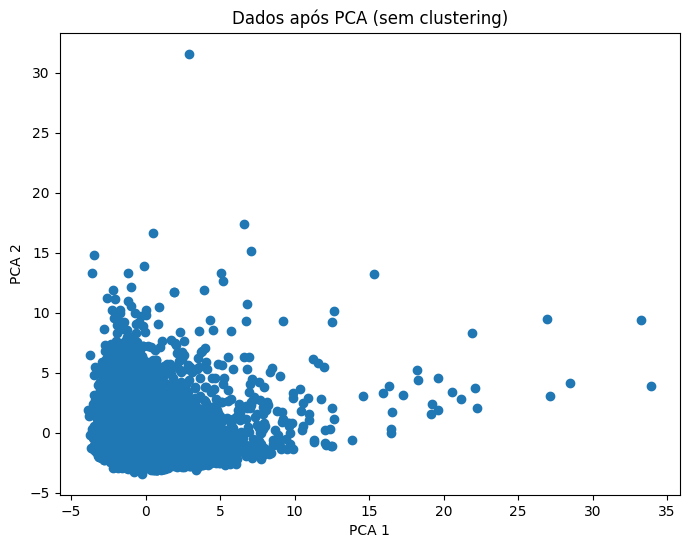

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title("Dados após PCA (sem clustering)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

Definição do Número Ideal de Clusters (Elbow + Silhouette)

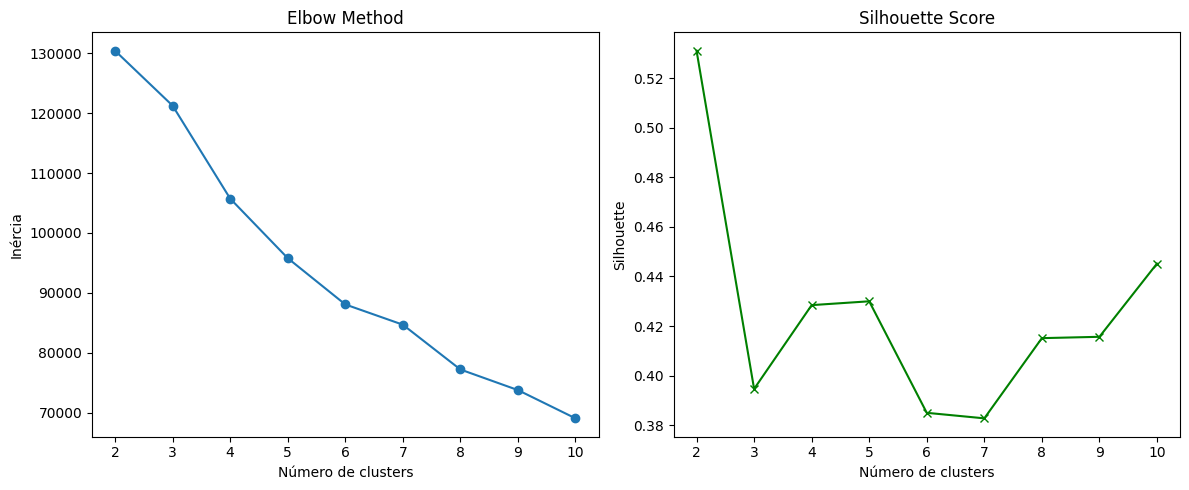

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(2,11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')

plt.subplot(1,2,2)
plt.plot(range(2,11), silhouette, marker='x', color='green')
plt.title('Silhouette Score')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette')

plt.tight_layout()
plt.show()

Aplicação do KMeans

In [46]:
best_k = 7  # suponha que você escolheu 4 com base nas análises anteriores

kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

df['Cluster'] = cluster_labels

Análise dos Clusters

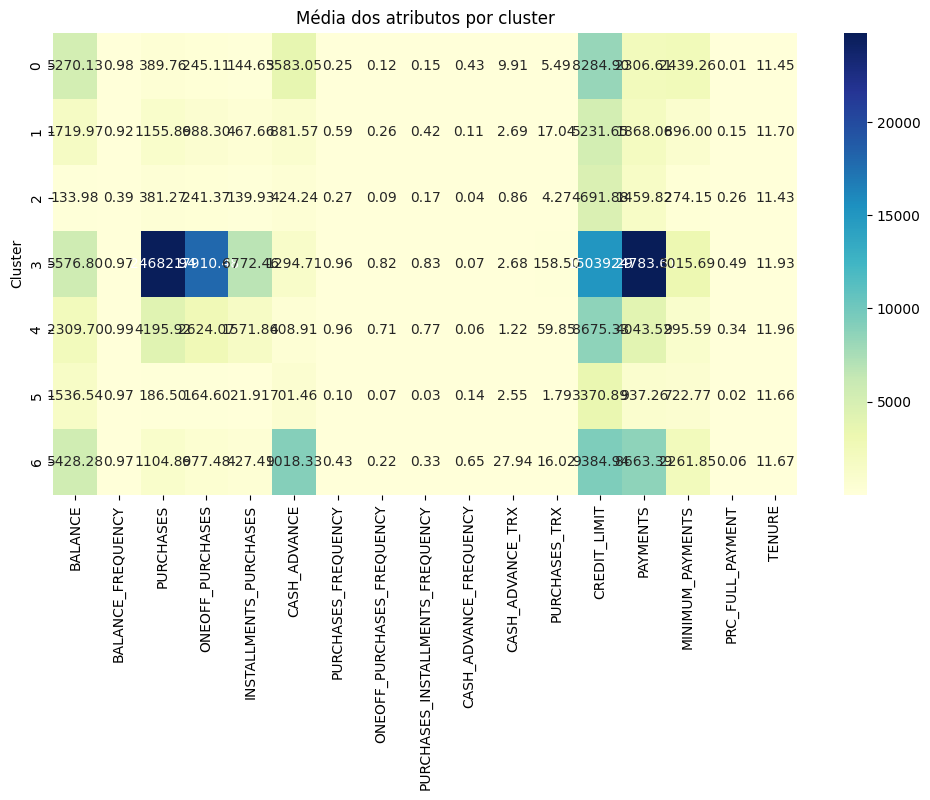

In [47]:
# Estatísticas por cluster
cluster_summary = df.groupby('Cluster').mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Média dos atributos por cluster")
plt.show()


Visualização com PCA + Cluster

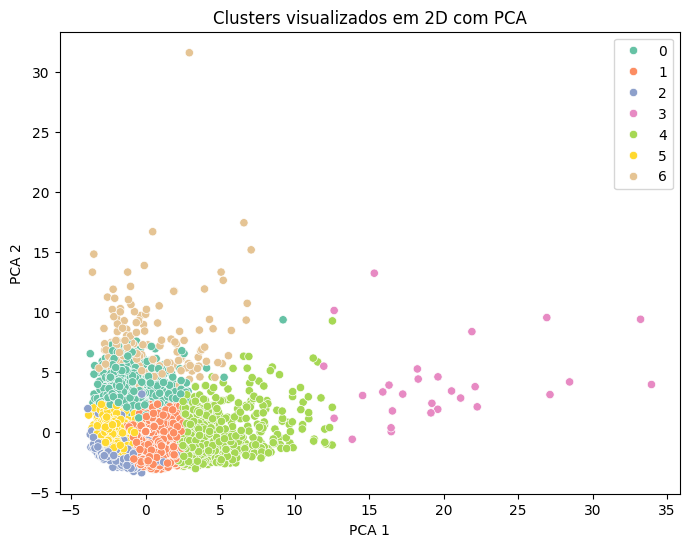

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=cluster_labels, palette="Set2")
plt.title("Clusters visualizados em 2D com PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()